# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv("heroes_information.csv")
powers_df = pd.read_csv("super_hero_powers.csv")

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df=heroes_df.drop(["Unnamed: 0"],axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [6]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [7]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
**1.** Figure out which categories have null values by using .sum().

**2.** Figure out the percentage of missing data the columns that have missing data.

**3.** Look at the data that's in that column to see if I can figure out a way to predict what the value should be.

**4.** If I can't see a good way to impute the missing values, I'll drop the column (if there's a lot of missing data) or I'll drop the rows that are missing data (if it's only a couple rows).



In [8]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [9]:
heroes_df.Publisher.value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
IDW Publishing         4
Icon Comics            4
Shueisha               4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Rebellion              1
J. K. Rowling          1
Microsoft              1
Universal Studios      1
Titan Books            1
J. R. R. Tolkien       1
Name: Publisher, dtype: int64

In [10]:
heroes_df.loc[heroes_df["Publisher"].isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


Looking at the entries that don't have a publisher listed, I noticed that there are definitely some placeholder values in the weight and height columns so I'll have to deal with those later, too.  I also notice that there are other missing values that aren't listed as `NaN` but are instead `-` so I'll need to look for those, too. 

In [11]:
heroes_df.dropna(subset=["Publisher"],inplace=True)

In [12]:
heroes_df.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [13]:
heroes_df.Weight.value_counts()

-99.0     225
 79.0      23
 54.0      23
 81.0      22
 90.0      19
 52.0      15
 86.0      15
 59.0      14
 56.0      13
 77.0      13
 61.0      13
 101.0     12
 50.0      12
 88.0      11
 63.0      11
 95.0      10
 74.0      10
 83.0       9
 65.0       9
 72.0       8
 68.0       8
 104.0      8
 135.0      8
 57.0       7
 97.0       7
 99.0       7
 117.0      6
 108.0      6
 55.0       5
 70.0       5
         ... 
 14.0       1
 356.0      1
 105.0      1
 324.0      1
 360.0      1
 236.0      1
 36.0       1
 140.0      1
 128.0      1
 248.0      1
 16.0       1
 45.0       1
 234.0      1
 96.0       1
 82.0       1
 76.0       1
 198.0      1
 116.0      1
 176.0      1
 170.0      1
 47.0       1
 78.0       1
 27.0       1
 25.0       1
 178.0      1
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

In [14]:
len(heroes_df.loc[heroes_df["Weight"]==-99.0])/len(heroes_df["Weight"])*100

31.29346314325452

In [15]:
real_weights=heroes_df.loc[heroes_df["Weight"]!=-99]
real_weights.groupby(["Gender"])["Weight"].describe() #getting the stats for the actual weights w/o being influenced by -99.0

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
-,14.0,128.642857,107.270045,39.0,70.25,94.0,128.75,383.0
Female,142.0,78.838028,76.975877,41.0,54.00,58.0,65.00,630.0
Male,338.0,125.698225,110.961822,2.0,79.00,90.0,122.00,900.0


It looks like there's a connection between gender and weight so I'm going to impute the values for weight based on the gender.  If the gender is `-`, I'm not going to change the weight for now. If the gender is `Female`, I'll assign the median value of `58.0` and if the gender is `Male`, I'll assign the median value of `90.0`.

In [16]:
heroes_df.loc[(heroes_df["Weight"]==-99)&(heroes_df["Gender"]=="Female"),"Weight"]=58.0
heroes_df.loc[(heroes_df["Weight"]==-99)&(heroes_df["Gender"]=="Male"),"Weight"]=90.0
heroes_df.loc[(heroes_df["Weight"]==-99)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
87,Bird-Brain,-,-,-,-,-99.0,Marvel Comics,-,good,-99.0
112,Blaquesmith,-,black,-,No Hair,-99.0,Marvel Comics,-,good,-99.0
134,Box IV,-,brown,-,Brown / Black,-99.0,Marvel Comics,-,good,-99.0
160,Captain Universe,-,-,God / Eternal,-,-99.0,Marvel Comics,-,good,-99.0
178,Clea,-,-,-,White,-99.0,Marvel Comics,-,good,-99.0
234,Ego,-,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
261,Fixer,-,red,-,No Hair,-99.0,Marvel Comics,-,bad,-99.0
280,Ghost Rider II,-,-,-,-,-99.0,Marvel Comics,-,good,-99.0
410,Living Tribunal,-,blue,Cosmic Entity,No Hair,-99.0,Marvel Comics,gold,neutral,-99.0
426,Man of Miracles,-,blue,God / Eternal,Silver,-99.0,Image Comics,-,-,-99.0


In [17]:
heroes_df.groupby(["Gender"])["Weight"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
-,27.0,19.037037,138.522834,-99.0,-99.00,39.0,94.0,383.0
Female,198.0,72.944444,65.798662,41.0,55.00,58.0,61.0,630.0
Male,494.0,114.425101,93.232927,2.0,82.25,90.0,101.0,900.0


The male and female placeholder weights have been fixed (because the minimums are no longer listed as being -99). 

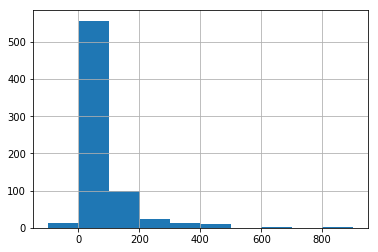

In [18]:
heroes_df.Weight.hist()

The histogram has definitely changed shape - the peak between 0 and 100 has gotten a lot taller now that the placeholder values have been reassigned.  The variance has decreased as well.

Next, I'll do the same thing for height.  First, I need to figure out what the median heights are by gender and then I'll reassign the placeholder value to those median values.

In [19]:
real_heights=heroes_df.loc[heroes_df["Height"]!=-99]
real_heights.groupby(["Gender"])["Height"].describe() #getting the stats for the actual heights w/o being influenced by -99.0

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
-,14.0,182.000000,14.790850,140.0,175.75,184.0,192.5,198.0
Female,144.0,174.684028,23.697817,62.5,168.00,170.0,178.0,366.0
Male,353.0,192.576487,68.755000,15.2,180.00,185.0,193.0,975.0


In [20]:
heroes_df.loc[(heroes_df["Height"]==-99)&(heroes_df["Gender"]=="Female"),"Height"]=170.0
heroes_df.loc[(heroes_df["Height"]==-99)&(heroes_df["Gender"]=="Male"),"Height"]=185.0
heroes_df.loc[(heroes_df["Height"]==-99)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
87,Bird-Brain,-,-,-,-,-99.0,Marvel Comics,-,good,-99.0
112,Blaquesmith,-,black,-,No Hair,-99.0,Marvel Comics,-,good,-99.0
134,Box IV,-,brown,-,Brown / Black,-99.0,Marvel Comics,-,good,-99.0
160,Captain Universe,-,-,God / Eternal,-,-99.0,Marvel Comics,-,good,-99.0
178,Clea,-,-,-,White,-99.0,Marvel Comics,-,good,-99.0
234,Ego,-,-,-,-,-99.0,Marvel Comics,-,bad,-99.0
261,Fixer,-,red,-,No Hair,-99.0,Marvel Comics,-,bad,-99.0
280,Ghost Rider II,-,-,-,-,-99.0,Marvel Comics,-,good,-99.0
410,Living Tribunal,-,blue,Cosmic Entity,No Hair,-99.0,Marvel Comics,gold,neutral,-99.0
426,Man of Miracles,-,blue,God / Eternal,Silver,-99.0,Image Comics,-,-,-99.0


In [21]:
heroes_df.groupby(["Gender"])["Height"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
-,27.0,46.703704,143.459942,-99.0,-99.0,140.0,184.0,198.0
Female,198.0,173.406566,20.298348,62.5,168.0,170.0,175.0,366.0
Male,494.0,190.413968,58.197671,15.2,183.0,185.0,188.0,975.0


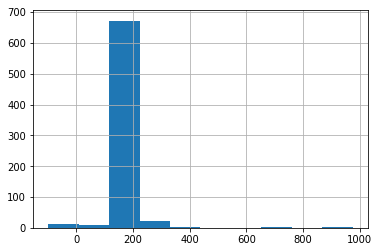

In [22]:
heroes_df.Height.hist()

In [23]:
len(heroes_df.loc[(heroes_df["Height"]==-99.0)|(heroes_df["Weight"]==-99.0)])

13

Since there are only 13 rows remaining with placeholder values for height and/or weight, I'm just going to drop those rows now.

In [24]:
rows_to_drop=heroes_df.loc[(heroes_df["Height"]==-99.0)|(heroes_df["Weight"]==-99)].index
heroes_df.drop(rows_to_drop,inplace=True)

In [25]:
len(heroes_df.loc[(heroes_df["Height"]==-99.0)|(heroes_df["Weight"]==-99.0)])

0

Now we have to deal with the values that are listed as `'-'`.  Let's see how many there are in each column.

In [26]:
for col in heroes_df:
    print(f"{col} has '-' for {round(len(heroes_df.loc[heroes_df[col]=='-'])/len(heroes_df[col])*100)}% of its values.")

name has '-' for 0% of its values.
Gender has '-' for 2% of its values.
Eye color has '-' for 22% of its values.
Race has '-' for 41% of its values.
Hair color has '-' for 22% of its values.
Height has '-' for 0% of its values.
Publisher has '-' for 0% of its values.
Skin color has '-' for 90% of its values.
Alignment has '-' for 1% of its values.
Weight has '-' for 0% of its values.


C:\Users\alvar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Since skin color is missing 90% of its values, it might be worthwhile to drop that column.  However, I think I'm going to keep everything the way it is now because it seems like having `'-'` as a value doesn't affect Python's ability to graph, calculate statistics, or perform other operations.  Just to verify that, I'm going to make a bargraph of the skin color data.

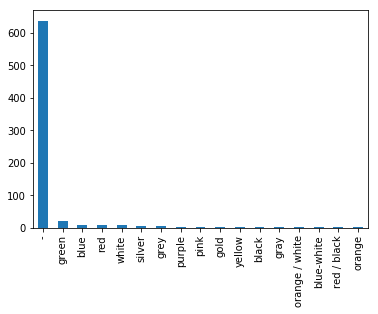

In [27]:
heroes_df["Skin color"].value_counts().plot(kind="bar")

So, `'-'` will show up as a category but I'm hesitant to lose all the other data.  So, I'm just going to graph the data that we do have instead (which is almost the same as deleting the rows with missing data, except I'm not actually deleting them - just ignoring them for a second).

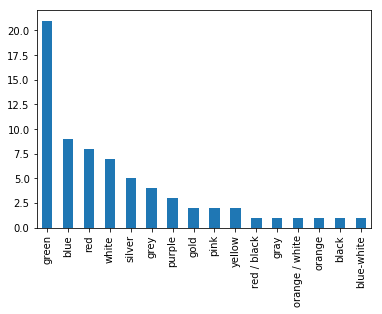

In [28]:
real_skin_colors=heroes_df.loc[heroes_df["Skin color"]!='-']
real_skin_colors["Skin color"].value_counts().plot(kind="bar")

That's way better.  We just have to be aware that, when we look at this graph, it's only a subset (and potentially not representative) of the population.

We can treat the other columns (that have `'-'` in them) similarly.

Text(0.5, 0, 'Hair Color')

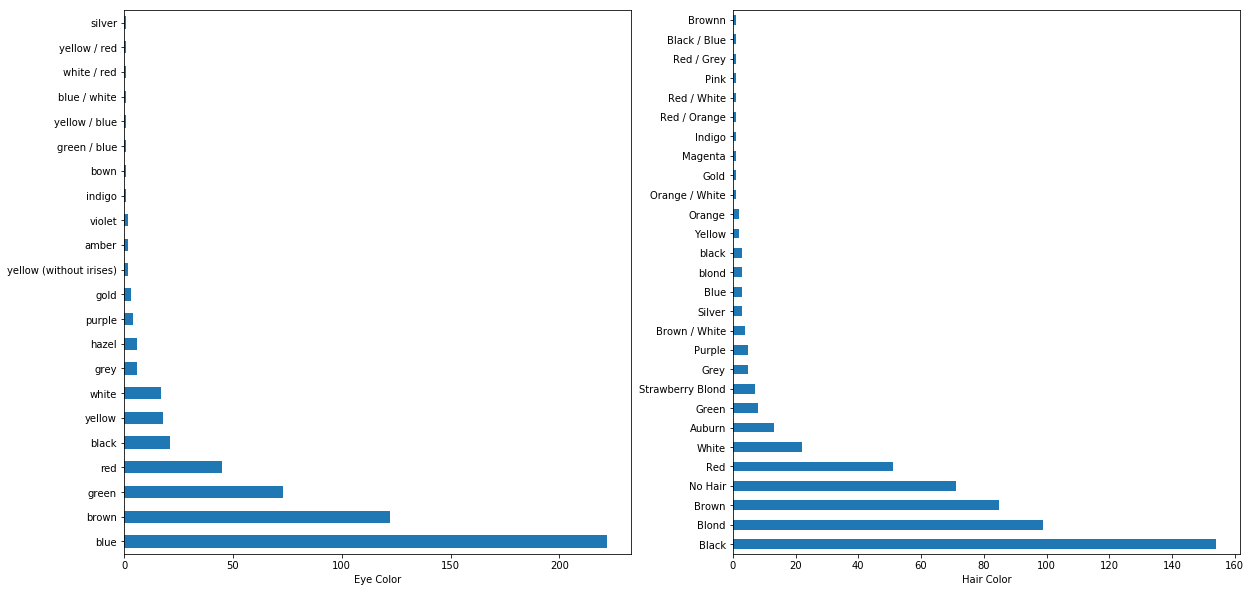

In [29]:
fig, (ax11, ax12) = plt.subplots(1, 2)

real_eye_colors=heroes_df.loc[heroes_df["Eye color"]!='-']["Eye color"].value_counts()
real_race=heroes_df.loc[heroes_df["Hair color"]!='-']["Hair color"].value_counts()

real_eye_colors.plot(kind="barh",ax=ax11, figsize=(20,10))
real_race.plot(kind="barh",ax=ax12)

ax11.xaxis.set_label_text("Eye Color")
ax12.xaxis.set_label_text("Hair Color")

Text(0.5, 0, 'Alignment')

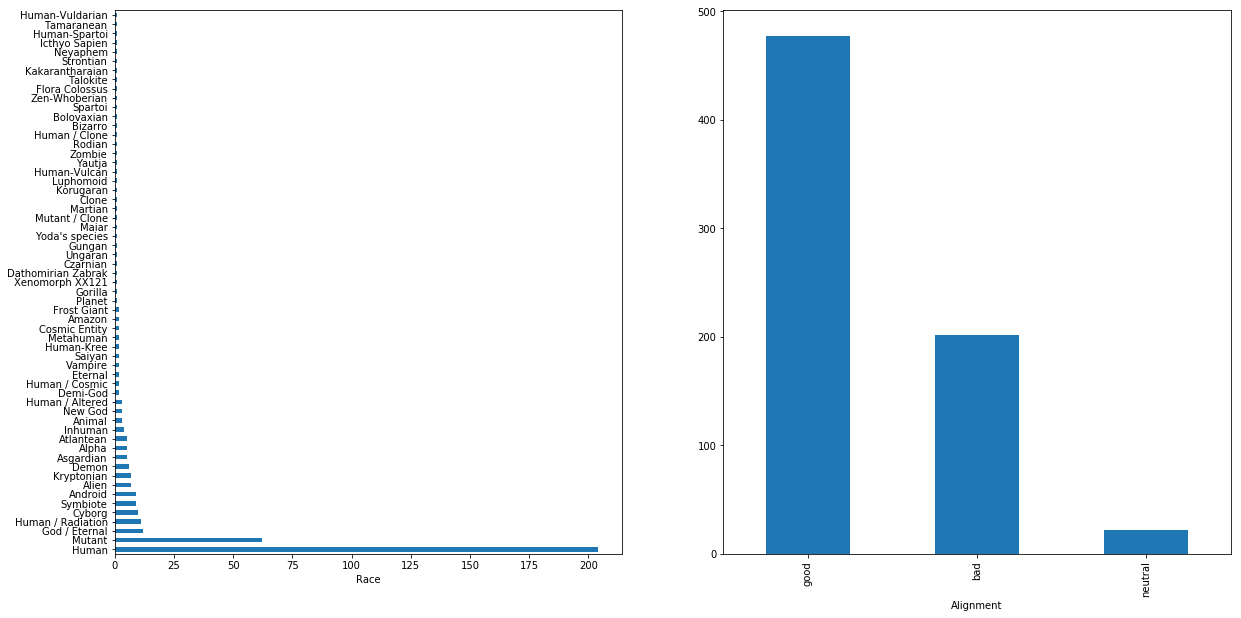

In [30]:
fig, (ax21, ax22) = plt.subplots(1, 2)

real_race=heroes_df.loc[heroes_df["Race"]!='-']["Race"].value_counts()
real_alignment=heroes_df.loc[heroes_df["Alignment"]!='-']["Alignment"].value_counts()

real_race.plot(kind="barh",ax=ax21,figsize=(20,10))
real_alignment.plot(kind="bar",ax=ax22)

ax21.xaxis.set_label_text("Race")
ax22.xaxis.set_label_text("Alignment")

Now, I'm going to move over to the other file `powers_df` and clean it up.

In [32]:
powers_df.isna().sum().sum() #adding all of the NaN sums together to see if there are any categories with NaN that I can't see
#since it equals 0, that means none of the columns are missing data.
#There still might be some inaccurate data though (placeholders, etc)

0

In [33]:
powers_df.dtypes

hero_names               object
Agility                    bool
Accelerated Healing        bool
Lantern Power Ring         bool
Dimensional Awareness      bool
Cold Resistance            bool
Durability                 bool
Stealth                    bool
Energy Absorption          bool
Flight                     bool
Danger Sense               bool
Underwater breathing       bool
Marksmanship               bool
Weapons Master             bool
Power Augmentation         bool
Animal Attributes          bool
Longevity                  bool
Intelligence               bool
Super Strength             bool
Cryokinesis                bool
Telepathy                  bool
Energy Armor               bool
Energy Blasts              bool
Duplication                bool
Size Changing              bool
Density Control            bool
Stamina                    bool
Astral Travel              bool
Audio Control              bool
Dexterity                  bool
                          ...  
Intuitiv

It looks like all of the columns are booleans (except for the column with the names of the superheros) so they can't have any placeholder values - everything has to be `True` or `False` if it's not `NaN` (and we know none of them are `NaN`).  The names of the heros could have placeholder values but it'd be pretty strange to not have the name recorded.  I'll check it out anyway, just in case.  All of the names should be unique so I'm going to see how many unique values there are and compare that to the number of rows.  If all of the names are unique, it should equal the number of rows.

In [34]:
len(powers_df.hero_names.unique())

667

In [35]:
len(powers_df["hero_names"])

667

Yep, they're the same.  So, this dataframe doesn't appear to be missing any data.

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

I'm going to do an inner join and, to make it easier, I'm going to rename the `name` column in `heroes_df` to `hero_names` so that it matches the name of the column in `powers_df`.  

In [36]:
heroes_df.rename({"name":"hero_names"},axis="columns",inplace=True)

In [37]:
heroes_df.head()

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,185.0,Marvel Comics,-,bad,90.0


In [38]:
heroes_df.set_index("hero_names").head()
powers_df.set_index("hero_names").head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
heroes_and_powers=heroes_df.join(powers_df,how='inner',lsuffix="-heroes_df",rsuffix="-powers_df")
heroes_and_powers.head()

,hero_names-heroes_df,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,185.0,Marvel Comics,-,bad,90.0,...,False,False,False,False,False,False,False,False,False,False


In [40]:
heroes_and_powers.rename({"hero_names-heroes_df":"name"},axis="columns",inplace=True)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [41]:
women=heroes_and_powers.loc[heroes_and_powers["Gender"]=="Female"]
men=heroes_and_powers.loc[heroes_and_powers["Gender"]=="Male"]
unknown_and_other=heroes_and_powers.loc[heroes_and_powers["Gender"]=="-"]
unknown_and_other.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
133,Box III,-,blue,-,Blond,193.0,Marvel Comics,-,good,110.0,...,False,False,False,False,False,False,False,False,False,False
165,Cecilia Reyes,-,brown,-,Brown,170.0,Marvel Comics,-,good,62.0,...,False,False,False,False,False,False,False,False,False,False
196,Cypher,-,blue,-,Blond,175.0,Marvel Comics,-,good,68.0,...,False,False,False,False,False,False,False,False,False,False
249,Fabian Cortez,-,blue,-,Brown,196.0,Marvel Comics,-,bad,96.0,...,False,False,False,False,False,False,False,False,False,False
253,Feral,-,yellow (without irises),-,Orange / White,175.0,Marvel Comics,-,good,50.0,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 0.98, 'Weight vs Height')

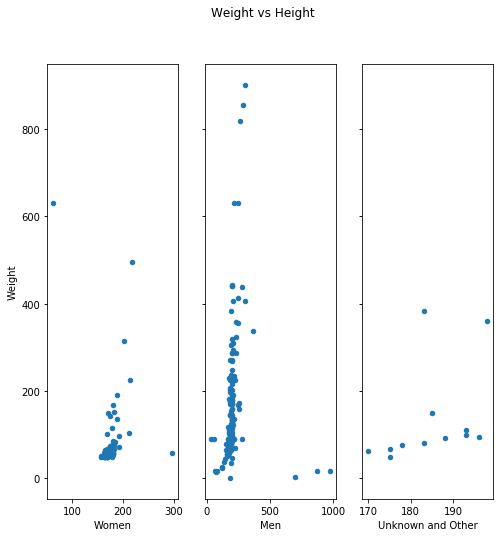

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,sharey=True,figsize=(8,8))

women.plot(x="Height",y="Weight",kind="scatter",ax=ax1)
men.plot(x="Height",y="Weight", kind="scatter",ax=ax2)
unknown_and_other.plot(x="Height",y="Weight", kind="scatter",ax=ax3)

ax1.xaxis.set_label_text("Women")
ax2.xaxis.set_label_text("Men")
ax3.xaxis.set_label_text("Unknown and Other")
fig.suptitle("Weight vs Height")

In [43]:
heroes_and_powers.loc[heroes_and_powers["Gender"]=="Female","Gender_number"]=1
heroes_and_powers.loc[heroes_and_powers["Gender"]=="Male","Gender_number"]=0
heroes_and_powers.loc[heroes_and_powers["Gender"]=="-","Gender_number"]=2
heroes_and_powers.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Gender_number
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,0.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,0.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,0.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,0.0
4,Abraxas,Male,blue,Cosmic Entity,Black,185.0,Marvel Comics,-,bad,90.0,...,False,False,False,False,False,False,False,False,False,0.0


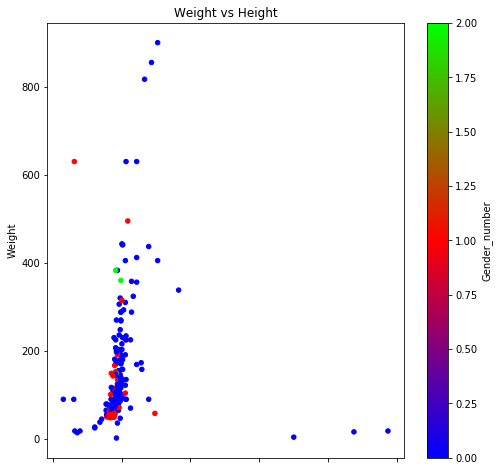

In [44]:
heroes_and_powers.plot.scatter("Height", "Weight",c="Gender_number",colormap='brg',figsize=(8,8),title="Weight vs Height")

In the graph above, the blue dots represent male superheroes, red represents women, and green represents unknown/other.

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [45]:
def show_distplot(dataframe, gender, column_name):
    if gender=="Male":
        return sns.distplot(men[column_name])
    elif gender=="Female":
        return sns.distplot(women[column_name])
    else:
        return sns.distplot(unknown_or_other[column_name])

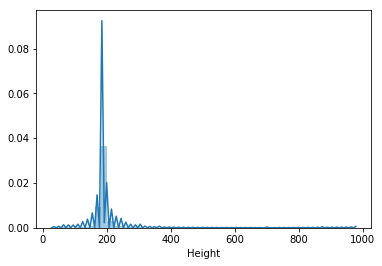

In [46]:
# Male Height
show_distplot(heroes_and_powers,"Male","Height")

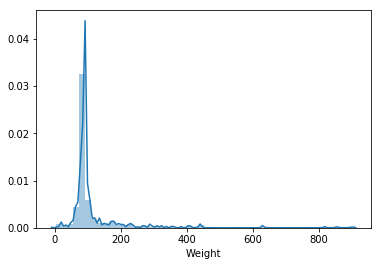

In [47]:
# Male Weight
show_distplot(heroes_and_powers,"Male","Weight")

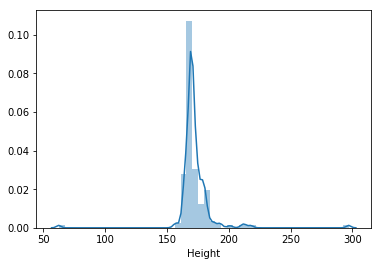

In [48]:
# Female Height
show_distplot(heroes_and_powers,"Female","Height")

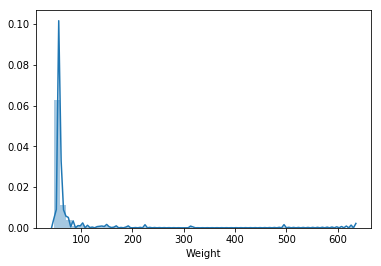

In [49]:
# Female Weight
show_distplot(heroes_and_powers,"Female","Weight")

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________

All four plots looks like (mostly) normal distributions, with some right skew.  The right skew makes sense in the context of the data since superheroes often have super-human weights/heights.

Male Height

It's got a peak around 185cm with a right skew which means the mean will be above 185.  The median will be above 185 as well, but not as far above it as the mean.  The mode doesnt't really make sense to talk about with continuous data, but if we're binning the data, it will be around 185 (where the peak is). The standard deviation is likely pretty small, because the peak is pretty high/the slope down the side is pretty steep. However, we need to keep in mind that the missing values for male weights were replaced with the median male weight of 185 which definitely affects the shape/spread of the data (it exaggerates the peak).

Female Height

It's got a peak at 170cm with a right skew so we can make all the same conclusions as we did for the male height.  Mean and median are above 170cm (with mean being higher than the median).  The mode is at 170 and the standard deviation is also small.  And, because we assigned the missing heights to be the median height, the peak is exaggerated and the standard deviation is lower.

Weights

We can also make similar statements about the weights for male/female superheroes.  The distributions are normal with a right skew. The means will be above the medians and the medians are slightly above the modes.  The missing weights were replaced with the median weights so the peaks are higher than they would be otherwise and thus the standard deviation is smaller.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [50]:
just_the_powers=powers_df.drop("hero_names",axis=1)

The top five most common powers are:

In [51]:
just_the_powers.sum().nlargest(5)

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

The five most common powers in the DC universe are:

In [52]:
dc_powers=heroes_and_powers.loc[heroes_and_powers["Publisher"]=="DC Comics"]
dc_just_powers=dc_powers.drop(['hero_names-powers_df','name','Gender','Eye color','Race','Hair color','Height','Publisher','Skin color','Alignment','Weight','Gender_number'],axis="columns")
dc_just_powers.sum().nlargest(5)

Super Strength    97
Stamina           91
Agility           81
Durability        76
Super Speed       75
dtype: int64

The five most common powers in the Marvel universe are:

In [53]:
marvel_powers=heroes_and_powers.loc[heroes_and_powers["Publisher"]=="Marvel Comics"]
marvel_just_powers=marvel_powers.drop(['hero_names-powers_df','name','Gender','Eye color','Race','Hair color','Height','Publisher','Skin color','Alignment','Weight','Gender_number'],axis="columns")
marvel_just_powers.sum().nlargest(5)

Super Strength    190
Stamina           140
Durability        135
Super Speed       129
Agility           109
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Color by Race

What colors are alien races?  To answer this, I'll start with a "groupby" to see what we're dealing with. This is a pretty straightforward investigation but we'll do more complex ones in future labs/projects.

In [104]:
race_colors=heroes_and_powers
rows_to_drop=race_colors.loc[(race_colors["Race"]=='-')|(race_colors["Skin color"]=='-')].index #Getting rid of unknown races and skin colors
race_colors.drop(rows_to_drop,inplace=True)

In [105]:
race_colors.loc[(race_colors["Race"]=='-')|(race_colors["Skin color"]=='-')]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Gender_number


In [107]:
race_colors.groupby("Race")["Skin color"].value_counts()

Race                Skin color    
Alien               gold              1
                    green             1
                    grey              1
                    silver            1
Android             gray              1
                    green             1
                    silver            1
Bizarro             white             1
Bolovaxian          pink              1
Cyborg              silver            1
Czarnian            blue-white        1
Dathomirian Zabrak  red / black       1
Demon               white             1
                    yellow            1
Eternal             purple            1
God / Eternal       green             1
                    white             1
Gungan              orange / white    1
Human               green             2
                    white             2
                    blue              1
                    purple            1
                    red               1
Human / Altered     green             1
Human

I'm noticing that there's not a lot of data for each alien race.  Most of them only have one or two different representatives and a lot of races only have one datapoint total.  So, I'm going to flip the question: if we have a being that's a certain color, what race might they be?

In [108]:
race_colors.groupby("Skin color")["Race"].value_counts()

Skin color      Race              
black           Xenomorph XX121       1
blue            Mutant                4
                Human                 1
                Human / Cosmic        1
                Icthyo Sapien         1
                Luphomoid             1
                Talokite              1
blue-white      Czarnian              1
gold            Alien                 1
                Human / Cosmic        1
gray            Android               1
green           Mutant                4
                Human                 2
                Alien                 1
                Android               1
                God / Eternal         1
                Human / Altered       1
                Human / Radiation     1
                Human-Kree            1
                Kakarantharaian       1
                Martian               1
                Metahuman             1
                Rodian                1
                Zen-Whoberian         1
grey 

Again, not very detailed results.  There's a hugely obvious problem, too.  If a being has black skin, then there's a 100% likelihood that the being is a Xenomorph, according to the dataset.  However, that's problematic.  Luke Cage is black and definitely not a Xenomorph. But does Luke Cage actually have black skin? Or should he be listed as brown?  Leaving him out makes it look like humans are white.  (But even "white" humans aren't really white, not in the same way that Gods or Demons might be white.)

Anyway, we just don't have a big enough dataset to make meaningful conclusions about colors and races.  We might be able to make some conclusions about social justice issues though.

In [115]:
heroes_df.loc[heroes_df['hero_names']=="Luke Cage"]

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
416,Luke Cage,Male,brown,Human,Black,198.0,Marvel Comics,-,good,191.0


Going back to the original file, it looks like Luke Cage was included but his skin color was missing and so his data was excluded from the analysis. (Just wanted to check.)

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data